In [1]:
import pandas as pd

# 학습/평가 데이터 로딩
train_x = pd.read_csv("./train_x.csv")
train_y = pd.read_csv("./train_y.csv")
test_x = pd.read_csv("./test_x.csv")
test_y = pd.read_csv("./test_y.csv")

In [2]:
train_x

,1d,7d,1h
0,45473.5373,43922.2281,44346.3680
1,45881.6978,43763.4929,45343.5803
2,46043.4090,43561.5708,45360.8773
3,46196.8840,43928.9929,45406.4553
4,46486.5784,44150.2973,45714.8724
...,...,...,...
41131,37095.1683,36688.7788,36482.1864
41132,37128.0132,36403.7340,36496.8251
41133,37277.6567,37304.8497,36673.3043
41134,38210.2001,37483.9406,37598.4329


In [3]:
train_y

,총생활인구수
0,45343.5803
1,45360.8773
2,45406.4553
3,45714.8724
4,45893.9595
...,...
41131,36496.8251
41132,36673.3043
41133,37598.4329
41134,38153.1943


In [4]:
test_y

,총생활인구수
0,40211.0421
1,40025.1502
2,40117.4054
3,40029.1231
4,40141.6145
...,...
2035,33304.5400
2036,33368.7201
2037,34083.1721
2038,34380.0806


In [5]:
test_x

,1d,7d,1h
0,40381.0231,40457.8532,40258.2546
1,40176.8742,40208.5948,40211.0421
2,40147.2060,40151.2422,40025.1502
3,40204.4250,40150.1174,40117.4054
4,40449.4525,40395.7121,40029.1231
...,...,...,...
2035,34687.7515,35837.1203,33773.1695
2036,34728.1718,35867.0404,33304.5400
2037,35767.8222,36299.9836,33368.7201
2038,36193.0573,36409.8234,34083.1721


In [6]:
train_x = train_x.values
train_y = train_y.values
test_x = test_x.values
test_y = test_y.values

In [7]:
train_x

array([[45473.5373, 43922.2281, 44346.368 ],
       [45881.6978, 43763.4929, 45343.5803],
       [46043.409 , 43561.5708, 45360.8773],
       ...,
       [37277.6567, 37304.8497, 36673.3043],
       [38210.2001, 37483.9406, 37598.4329],
       [40879.4209, 40259.8901, 38153.1943]])

In [8]:
train_y

array([[45343.5803],
       [45360.8773],
       [45406.4553],
       ...,
       [37598.4329],
       [38153.1943],
       [40404.9785]])

In [9]:
test_x

array([[40381.0231, 40457.8532, 40258.2546],
       [40176.8742, 40208.5948, 40211.0421],
       [40147.206 , 40151.2422, 40025.1502],
       ...,
       [35767.8222, 36299.9836, 33368.7201],
       [36193.0573, 36409.8234, 34083.1721],
       [38468.1344, 39266.3421, 34380.0806]])

In [10]:
test_y

array([[40211.0421],
       [40025.1502],
       [40117.4054],
       ...,
       [34083.1721],
       [34380.0806],
       [37074.2785]])

---

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",#"NanumGothicCoding", 
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')

### 가. LinearRegression 부터 시작해봅시다.

#### [실습문제1] 머신러닝_1
* Train과 Test로 나눈 데이터를 기준으로 LinearRegression 모델링을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [12]:
# 아래에 실습코드를 작성하세요.

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score as r2
from math import sqrt

LR_reg = LinearRegression()
LR_reg.fit(train_x, train_y)

LinearRegression()

In [13]:
# Test 데이터로 성능을 평가해보세요.

y_pred_LR = LR_reg.predict(test_x)

print('LinearRegression')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_LR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_LR))))
print("r2 : ", r2(test_y,y_pred_LR))

LinearRegression
Mean Squared Error : 331306.01550
Root Mean Squared Error : 575.59188
r2 :  0.8961346104562363


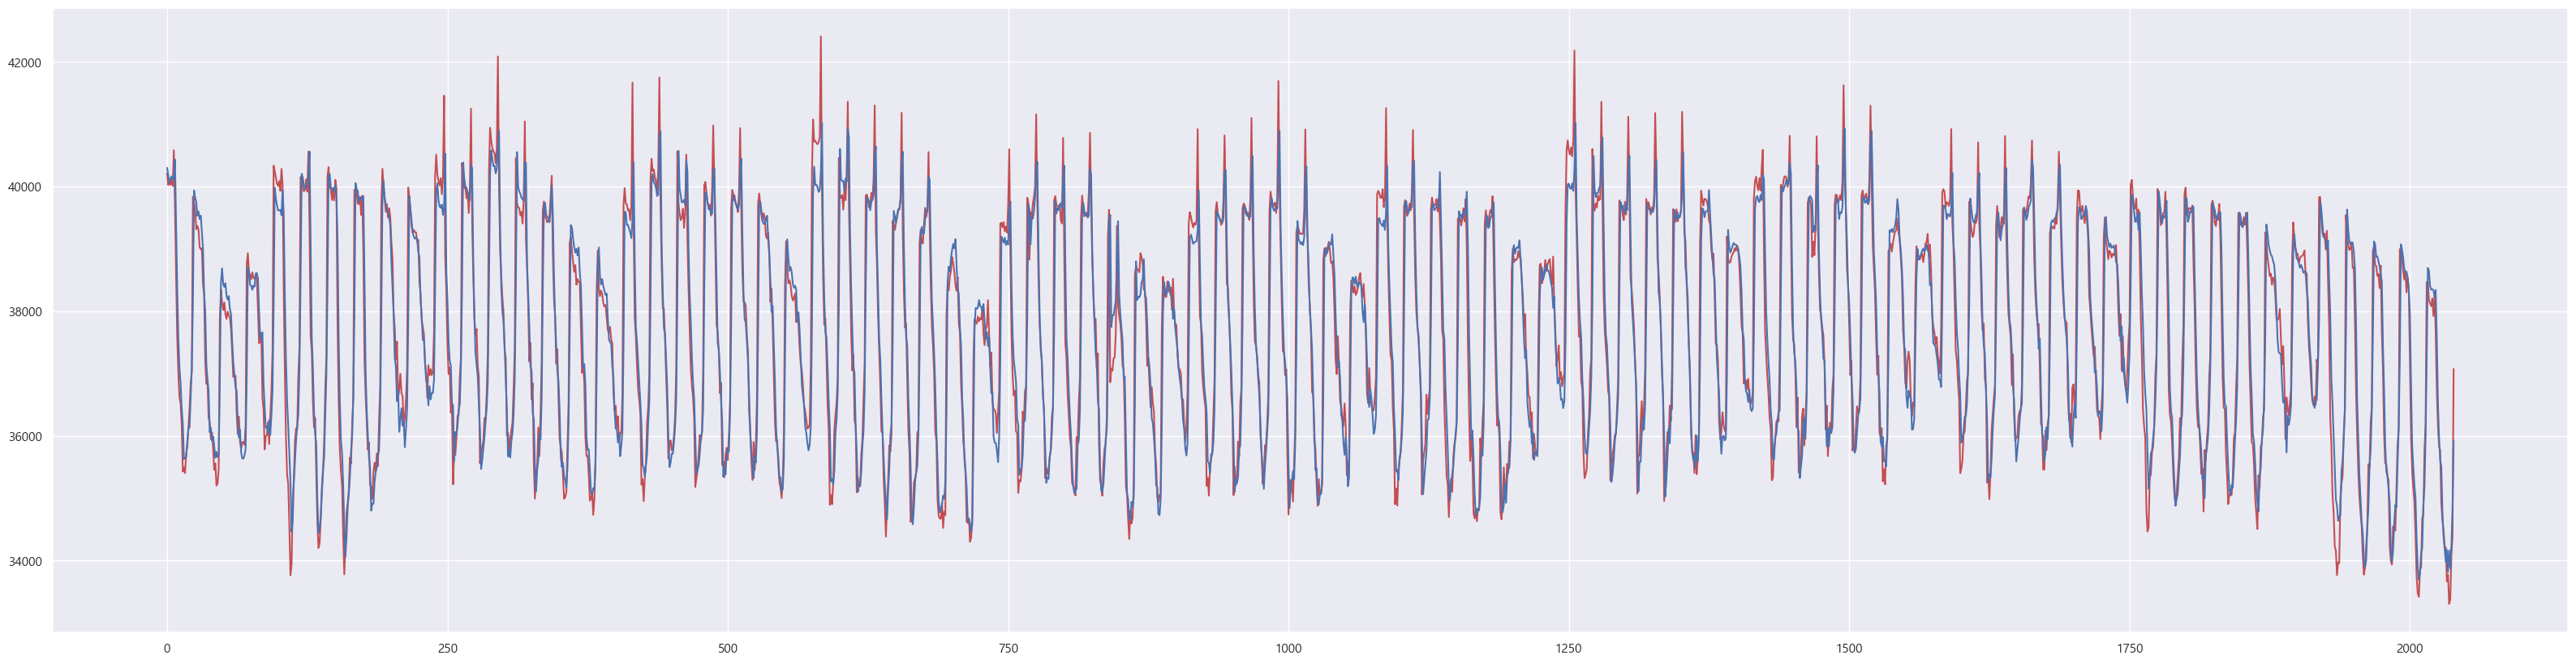

In [14]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_LR)

### 나. 다음은 앙상블 기법을 토대로 랜덤포레스트와 그라디언부스팅을 활용해봅시다.

#### 1) 렌덤포레스트
##### 배깅의 일종으로 의사결정나무(Decision Tree) 여러 개를 모아서 숲을 랜덤으로 구성하고 이를 종합해서 최종 모델을 산출하는 기법이라고 할 수 있다.

#### [실습문제2] 머신러닝_2
* Train과 Test로 나눈 데이터를 기준으로 렌덤포레스트로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [15]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import RandomForestRegressor as RFR

RFR_reg = RFR()
RFR_reg.fit(train_x, train_y)

C:\Users\Public\Documents\ESTsoft\CreatorTemp\ipykernel_5960\4150206231.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  RFR_reg.fit(train_x, train_y)


RandomForestRegressor()

In [16]:
# Test 데이터로 성능을 평가해보세요.

y_pred_RFR = RFR_reg.predict(test_x)

print('RandomForestRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_RFR)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_RFR))))
print("r2 : ", r2(test_y,y_pred_RFR))

RandomForestRegressor
Mean Squared Error : 369524.63301
Root Mean Squared Error : 607.88538
r2 :  0.8841529638497436


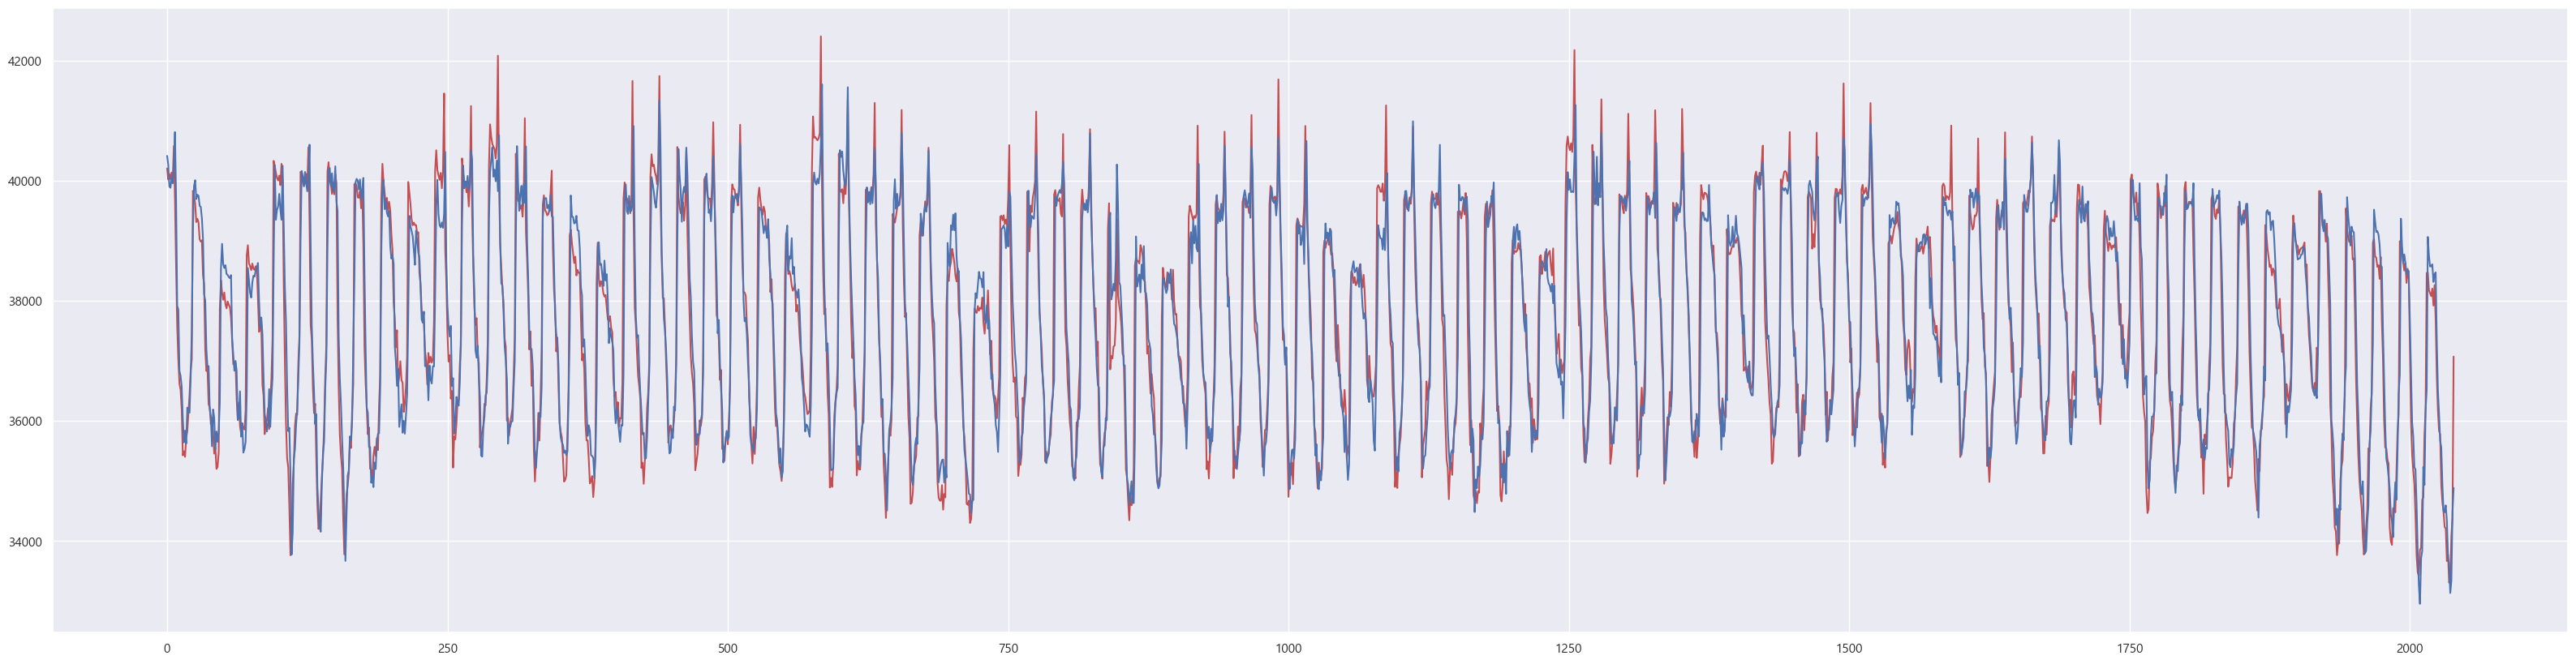

In [17]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_RFR)

#### [실습문제3] 머신러닝_3
* 렌덤포레스트로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [18]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
rfr_importances = RFR_reg.feature_importances_
forest_importances = pd.Series(rfr_importances, index = feature_names)
forest_importances

feature 0    0.046188
feature 1    0.044062
feature 2    0.909750
dtype: float64

#### 2) GradientBoosting
##### 앞선 모델의 에러를 다음 모델의 예측 값으로 활용하면서 가중치 업데이트 하는데 경사하강법(Gradient Descent)를 활용해서 최적 모델을 만드는 기법

#### [실습문제4] 머신러닝_4
* Train과 Test로 나눈 데이터를 기준으로 그라디언트부스팅으로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [20]:
# 아래에 실습코드를 작성하세요.

from sklearn.ensemble import GradientBoostingRegressor as GBR

gbr_reg = GBR()
gbr_reg.fit(train_x, train_y)

C:\Users\khh53\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:570: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GradientBoostingRegressor()

In [21]:
# Test 데이터로 성능을 평가해보세요.

y_pred_gbr = gbr_reg.predict(test_x)

print('GradientBoostingRegressor')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_gbr)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_gbr))))
print("r2 : ", r2(test_y,y_pred_gbr))

GradientBoostingRegressor
Mean Squared Error : 370147.03702
Root Mean Squared Error : 608.39710
r2 :  0.8839578384025272


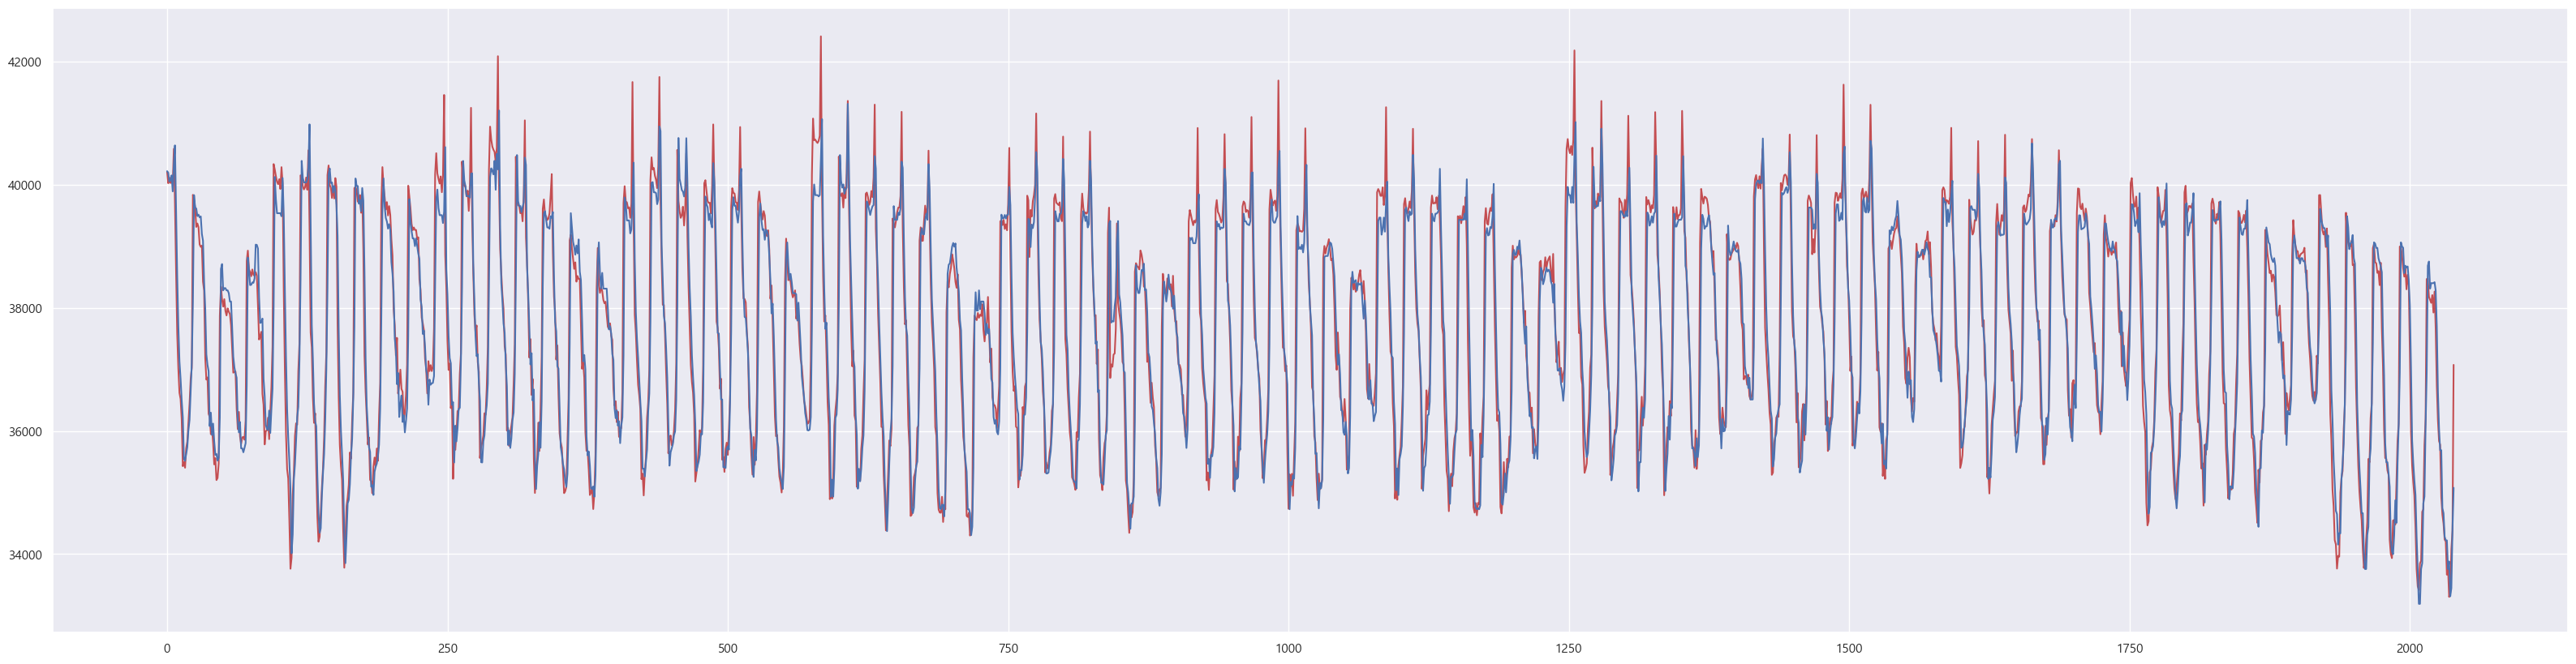

In [22]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_gbr)

In [23]:
y_pred_gbr

array([40220.82063316, 40196.80798617, 40054.09239565, ...,
       33446.81472176, 34406.82556381, 35077.4952142 ])

#### [실습문제5] 머신러닝_5
* 그라디언트부스팅으로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

In [24]:
# Feature의 중요도 확인

feature_names = [f"feature {i}" for i in range(train_x.shape[1])]
gbr_importances = gbr_reg.feature_importances_
gradient_importances = pd.Series(gbr_importances, index = feature_names)
gradient_importances

feature 0    0.260939
feature 1    0.032113
feature 2    0.706948
dtype: float64

### 3) Self Choice Model
##### 앞선 교육과정에서 배운 머신러닝 모델 중 어떤 것이든 좋습니다. 원하는 모델을 선택해서 학습을 시켜보세요.

#### [실습문제6] 머신러닝_6
* Train과 Test로 나눈 데이터를 기준으로 Self Choice Model로 모델을 학습을 진행하고 평가를 해주세요.
* 성능지표 : RMSE, R-squared Score

In [26]:
# 아래에 실습코드를 작성하세요.

import xgboost

xgb_reg = xgboost.XGBRegressor(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75, colsample_bytree=1, max_depth=7)
xgb_reg.fit(train_x, train_y)
y_pred_xgb = xgb_reg.predict(test_x)

In [27]:
# Test 데이터로 성능을 평가해보세요.

print('Xgboost')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_xgb)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_xgb))))
print("r2 : ", r2(test_y,y_pred_xgb))

Xgboost
Mean Squared Error : 343524.82724
Root Mean Squared Error : 586.10991
r2 :  0.892303977800538


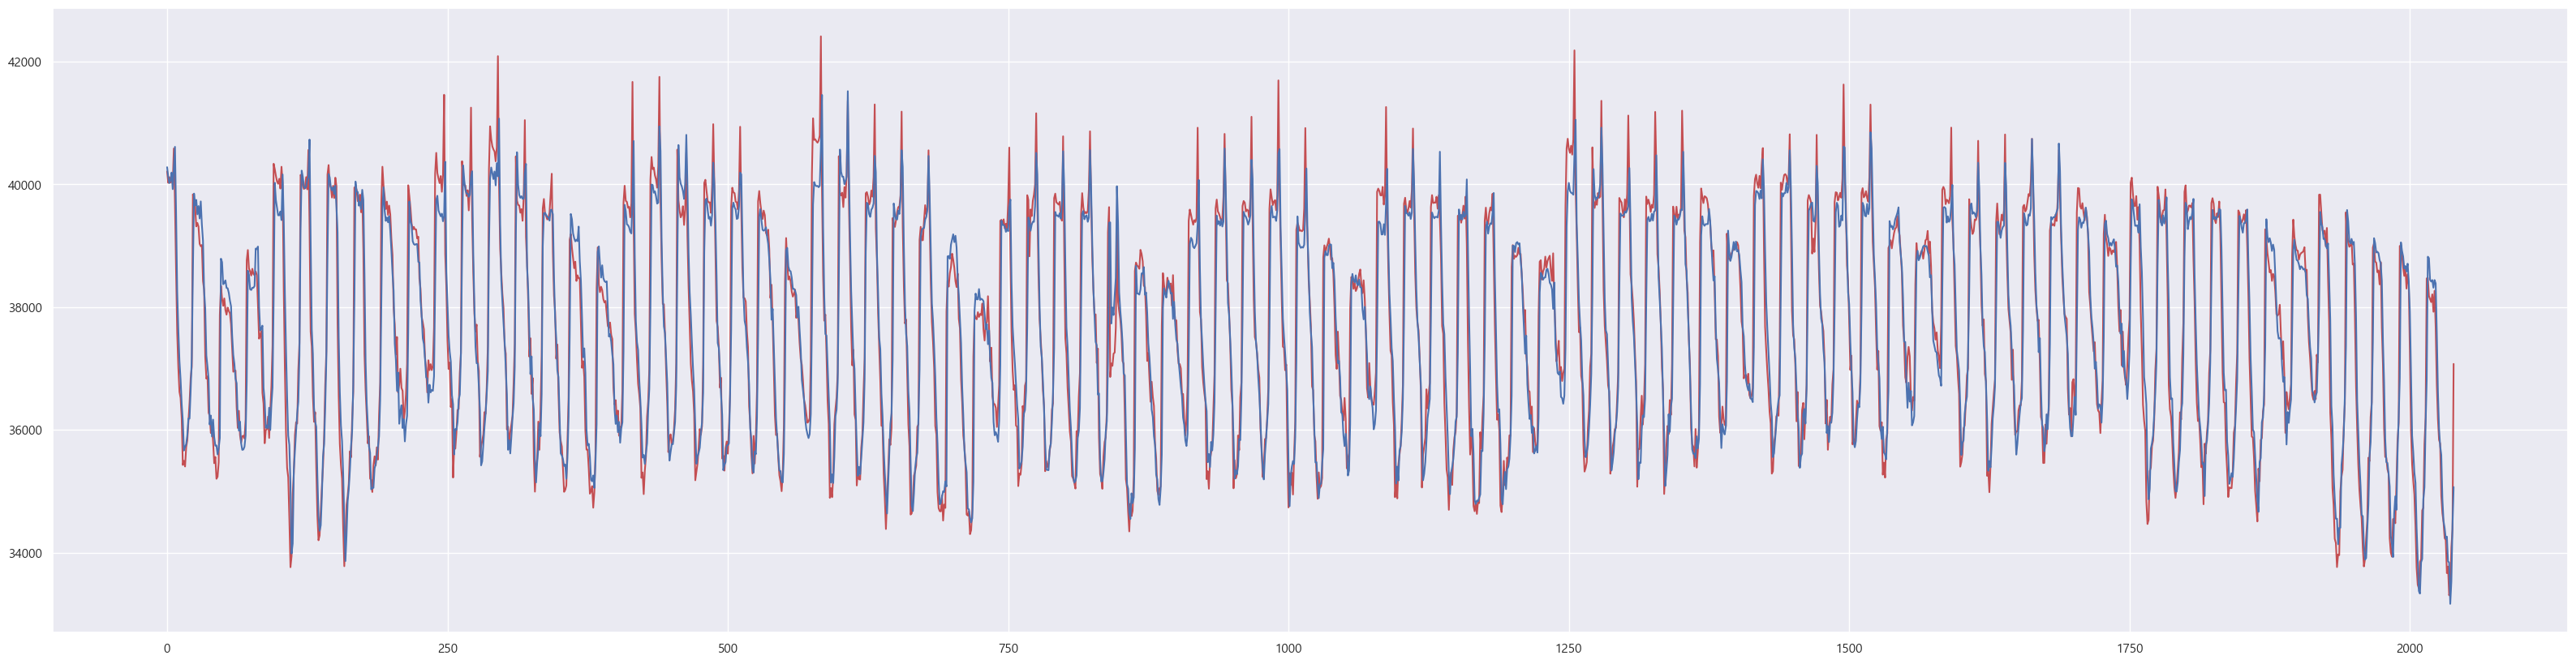

In [28]:
# 아래에 실습코드를 작성하세요.

plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_xgb)

#### [실습문제7] 머신러닝_7
* Self Choice Model로 학습한 모델의 feature_importances 또는 Shap value를 구해보세요.
* 확인할 수 있는 내용으로 우리 모델에서의 인사이트를 정리해보세요.

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

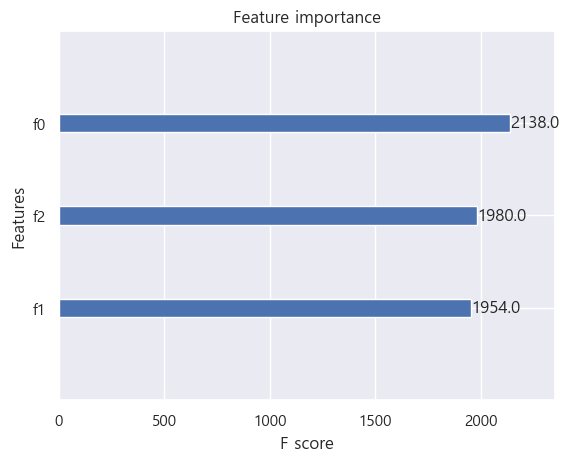

In [29]:
# Feature의 중요도 확인

xgboost.plot_importance(xgb_reg)

# 2. Deep Learning 
## 이번엔 딥러닝 모델링을 해봅시다.

#### [실습문제9] 딥러닝_1
* tensorflow 라이브러리를 활용한 모델을 자유롭게 만들어보세요.

In [42]:
import tensorflow as tf
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import ModelCheckpoint

In [43]:
model1 = tf.keras.models.Sequential([
    Dense(128, activation='relu', input_shape=(3,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(1),])

model1.compile(optimizer = 'adam', loss = 'mse', metrics = ['mse'])

In [44]:
history1 = model1.fit(train_x, train_y, epochs= 10, validation_split=0.2)

Epoch 1/10
1029/1029 [==============================] - 3s 3ms/step - loss: 30846198.0000 - mse: 30846198.0000 - val_loss: 382546.7812 - val_mse: 382546.7812
Epoch 2/10
1029/1029 [==============================] - 3s 3ms/step - loss: 792320.5000 - mse: 792320.5000 - val_loss: 324603.5000 - val_mse: 324603.5000
Epoch 3/10
1029/1029 [==============================] - 3s 3ms/step - loss: 769780.1250 - mse: 769780.1250 - val_loss: 358977.9375 - val_mse: 358977.9375
Epoch 4/10
1029/1029 [==============================] - 3s 3ms/step - loss: 777964.0000 - mse: 777964.0000 - val_loss: 498563.7812 - val_mse: 498563.7812
Epoch 5/10
1029/1029 [==============================] - 3s 3ms/step - loss: 779554.8125 - mse: 779554.8125 - val_loss: 308316.1875 - val_mse: 308316.1875
Epoch 6/10
1029/1029 [==============================] - 3s 3ms/step - loss: 804194.5000 - mse: 804194.5000 - val_loss: 471144.5312 - val_mse: 471144.5312
Epoch 7/10
1029/1029 [==============================] - 3s 3ms/step - lo

In [45]:
y_pred_deep1 = model1.predict(test_x)

64/64 [==============================] - 0s 2ms/step


In [46]:
y_pred_deep1

array([[40398.03 ],
       [40256.71 ],
       [40144.87 ],
       ...,
       [34784.18 ],
       [35290.49 ],
       [36218.473]], dtype=float32)

In [47]:
test_y

array([[40211.0421],
       [40025.1502],
       [40117.4054],
       ...,
       [34083.1721],
       [34380.0806],
       [37074.2785]])

In [48]:
print('DEEP1')
print("Mean Squared Error : {0:.5f}".format(mse(test_y,y_pred_deep1)))
print("Root Mean Squared Error : {0:.5f}".format(sqrt(mse(test_y,y_pred_deep1))))
print("r2 : ", r2(test_y,y_pred_deep1))

DEEP1
Mean Squared Error : 298370.32606
Root Mean Squared Error : 546.23285
r2 :  0.9064600439024065


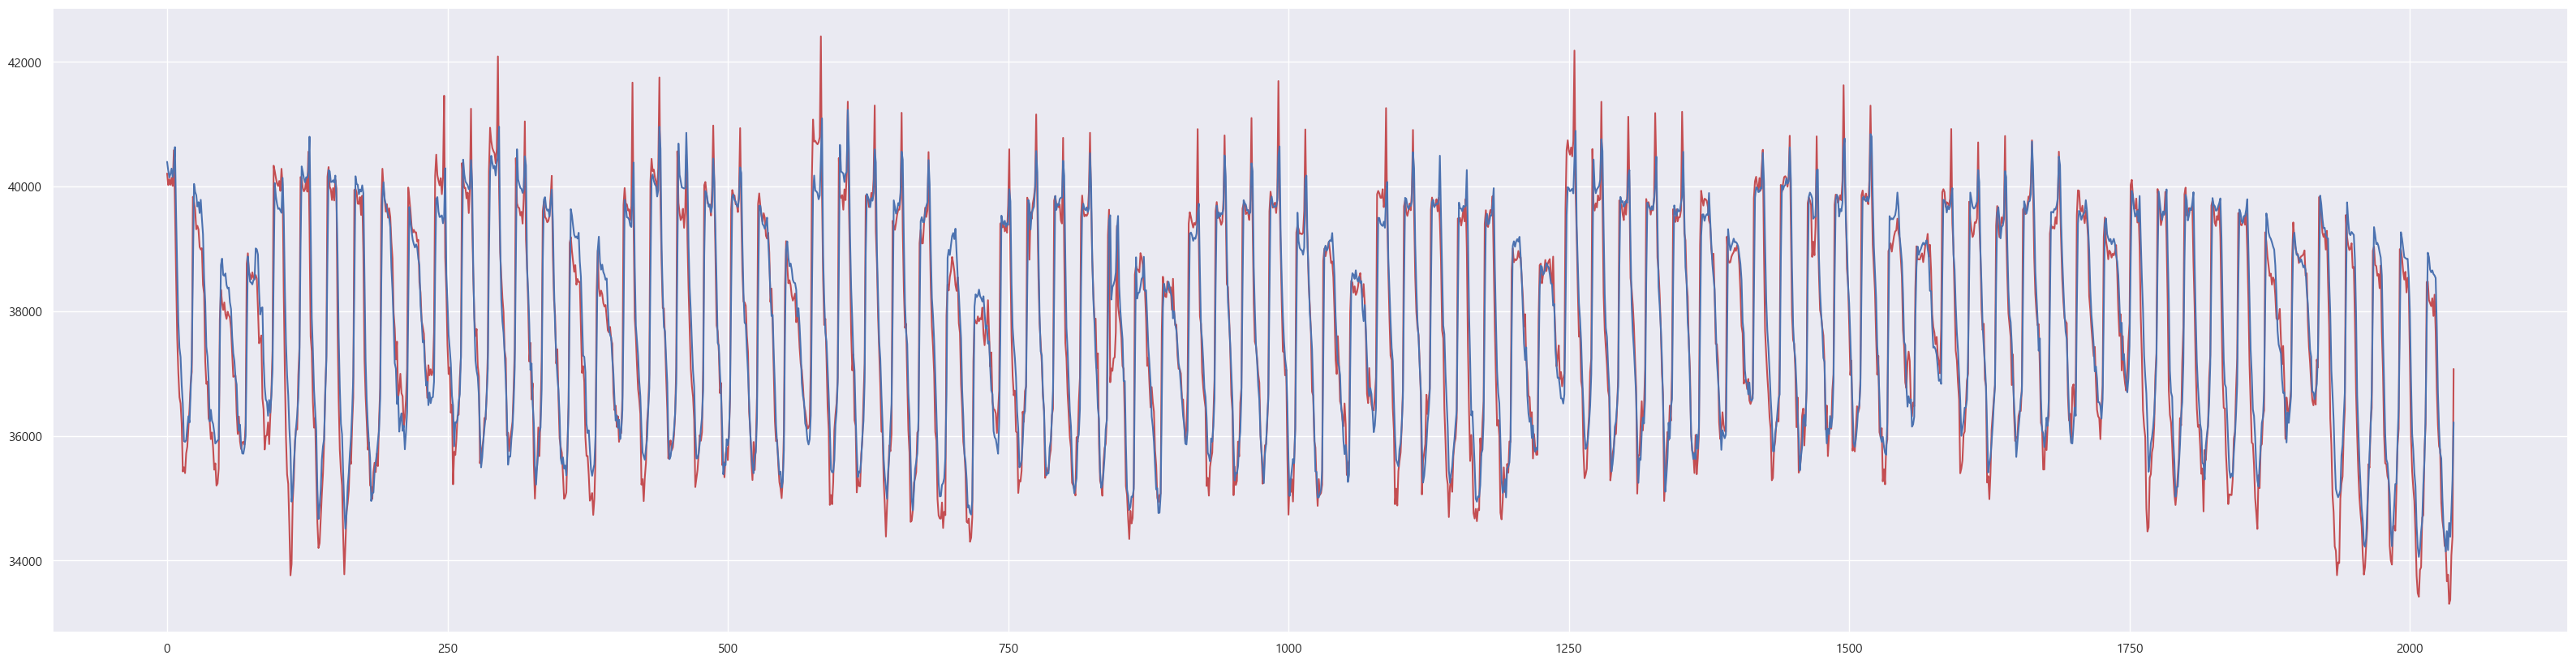

In [49]:
plt.figure(figsize=(40,10))
plt.plot(test_y, color='r')
plt.plot(y_pred_deep1)

In [ ]:
import numpy as np
import pandas as pd

predict = pd.DataFrame(y_pred_deep1).iloc[0:1416]
predict.to_csv("predict.csv", index=True)
predict = pd.read_csv("./predict.csv")
predict.columns = ['id', 'count']
predict.to_csv("predict.csv", index=False)

In [ ]:
# LSTM

In [156]:
train_x = np.array(train_x).reshape(train_x.shape[0], train_x.shape[1], 1)
test_x = np.array(test_x).reshape(test_x.shape[0], test_x.shape[1], 1)

In [159]:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD,Adadelta,Adam,RMSprop 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout

# input shape에 전처리된 train_x의 형태를 넣는다
# 20%로 Drop-out 했다
model3 = keras.Sequential()
model3.add(keras.layers.LSTM(units=128,input_shape=(train_x.shape[1], train_x.shape[2])))
model3.add(keras.layers.Dropout(rate=0.2))
model3.add(keras.layers.Dense(units=1))
model3.compile(loss='mean_squared_error', optimizer='adam')

# 10개의 batch로 100번 epoch 함
history = model3.fit(train_x, train_y, validation_split=0.2, batch_size=10, epochs=10)

Epoch 1/10
3247/3247 [==============================] - 22s 6ms/step - loss: 1731347840.0000 - val_loss: 1468365184.0000
Epoch 2/10
3247/3247 [==============================] - 20s 6ms/step - loss: 1723826432.0000 - val_loss: 1461417216.0000
Epoch 3/10
3247/3247 [==============================] - 20s 6ms/step - loss: 1716313856.0000 - val_loss: 1454489856.0000
Epoch 4/10
3247/3247 [==============================] - 20s 6ms/step - loss: 1708815744.0000 - val_loss: 1447580032.0000
Epoch 5/10
3247/3247 [==============================] - 19s 6ms/step - loss: 1701388032.0000 - val_loss: 1440688640.0000
Epoch 6/10
3247/3247 [==============================] - 20s 6ms/step - loss: 1693942144.0000 - val_loss: 1433811200.0000
Epoch 7/10
3247/3247 [==============================] - 19s 6ms/step - loss: 1686481536.0000 - val_loss: 1426948096.0000
Epoch 8/10
3247/3247 [==============================] - 20s 6ms/step - loss: 1679078272.0000 - val_loss: 1420102400.0000
Epoch 9/10
3247/3247 [==========